In [47]:
# Kerakli kutubxonlardi tortib olamiz

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
# dataset ornatib olamiz
data = pd.read_csv("Carseats.csv")

In [49]:
# data bilan tanishib chiqamiz
print(data.head())

   Sales  CompPrice  Income  Advertising  Population Price ShelveLoc  Age  \
0   9.50        138      73           11         276   120       Bad   42   
1  11.22        111      48           16         260    83      Good   65   
2  10.06        113      35           10         269    80    Medium   59   
3   7.40        117     100            4         466    97    Medium   55   
4   4.15        141      64            3         340   128       Bad   38   

  Education Urban   US  
0        17   Yes  Yes  
1        10   Yes  Yes  
2        12   Yes  Yes  
3        14   Yes  Yes  
4        13   Yes   No  


In [50]:
# data bilan tanishib chiqamiz
data.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [53]:
# data bilan tanishib chiqamiz
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    object 
 6   ShelveLoc    399 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    object 
 9   Urban        400 non-null    object 
 10  US           397 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 34.5+ KB


In [54]:
# data bilan tanishib chiqamiz
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Age
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,53.105000
std,2.824115,15.334512,27.986037,6.650364,147.376436,16.432408
min,0.000000,77.000000,21.000000,0.000000,10.000000,12.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,39.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,54.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,66.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,80.000000


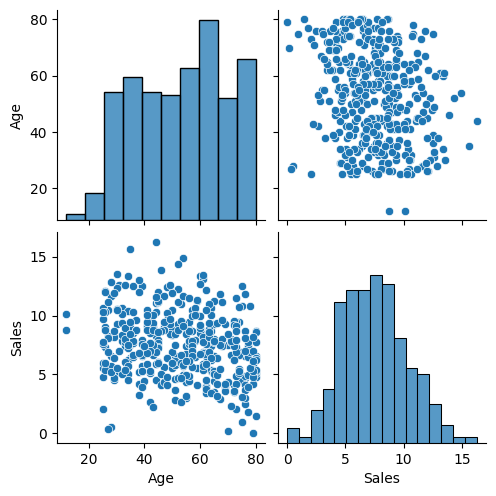

In [55]:
#plotting orqali datamiz bilan tanishib olamiz

import seaborn as sns  
import matplotlib.pyplot as plt 
sns.pairplot(data[['Age','Sales']])
plt.show()

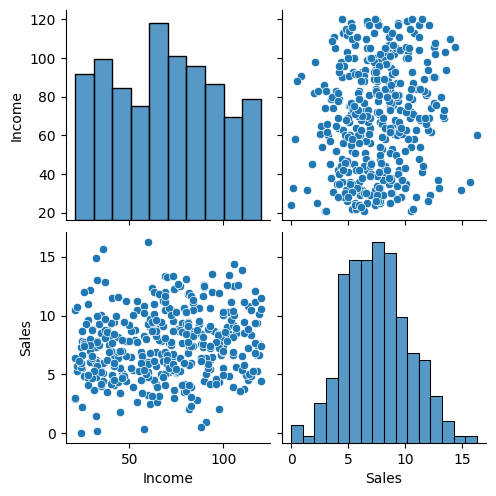

In [57]:
#plotting orqali datamiz bilan tanishib olamiz

sns.pairplot(data[['Income','Sales']])
plt.show()

In [59]:
# Null qiymatlarni tekshib olamiz

data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      1
Age            0
Education      0
Urban          0
US             3
dtype: int64

In [60]:
# Null qiymatlarni yoqotib olamiz

for col in data.columns:
    if data[col].isnull().sum()>0:
        if data[col].dtype=='object':
            data[col].fillna(data[col].mode()[0], inplace=True)
        else:
            data[col].fillna(data[col].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_9848\2753614588.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [61]:
#Null qiymatlar ozgarganmi yoqmi tekshirib olamiz

data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [63]:
# Kategorik qiymatlar bor yoki yoqligini tekshirib olamiz
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    object 
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    object 
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 34.5+ KB


In [64]:
# categorical qiymatlarni numerical qiymatga otkazib olamiz

categorical_col=data.select_dtypes(include=['object', 'category']).columns
label_encoder=LabelEncoder()
for col in categorical_col:
    data[col]=label_encoder.fit_transform(data[col])

In [65]:
#Numericalga otganmi yoqmi tekshiramiz

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


In [66]:
#x va y ni aniqlash
x=data.drop('US',axis=1)

In [67]:
# US columngacha bolganni teskhiramiz

x.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,9.50,138,73,11,276,20,2,42,7,1
1,11.22,111,48,16,260,85,3,65,0,1
2,10.06,113,35,10,269,82,4,59,2,1
3,7.40,117,100,4,466,98,4,55,4,1
4,4.15,141,64,3,340,28,2,38,3,1


In [ ]:
# Target variable bilan yana bir bor korib qoyamiz datamizni 

data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,20,2,42,7,1,1
1,11.22,111,48,16,260,85,3,65,0,1,1
2,10.06,113,35,10,269,82,4,59,2,1,1
3,7.40,117,100,4,466,98,4,55,4,1,1
4,4.15,141,64,3,340,28,2,38,3,1,0


In [69]:
#Target variablemiz bilan tanishib chiqamiz

y=data['US']

In [70]:
#Target variablemiz bilan tanishib chiqamiz
y.head()

0    1
1    1
2    1
3    1
4    0
Name: US, dtype: int64

In [76]:
# Splitting ga ajratib olamiz
from sklearn.model_selection import train_test_split

In [77]:
# Step 1: Split into 70% training and 30% temp
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

# Step 2: Split the temp set into 50% validation and 50% test
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [79]:
#Tekshirib olamiz

len(x_train)

280

In [80]:
# Tekshirib olamiz
len(x_val)

60

In [82]:
#Model aniqlab olamiz
knn = KNeighborsClassifier(n_neighbors=5)  # k= 5 nearest neighbors
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [88]:
# modelni moslashtirib olamiz

y_pred = knn.predict(x_test)

In [89]:
#accuracy ni tekshiramiz

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.58


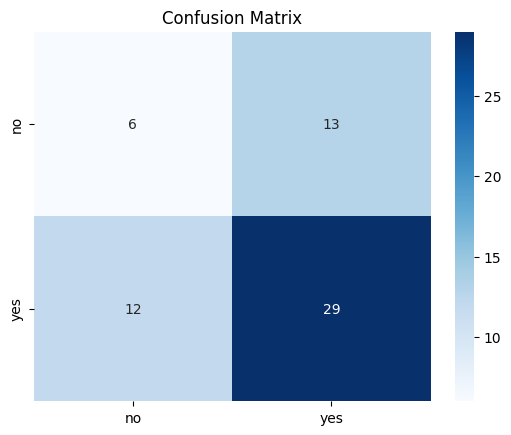

In [ ]:
# Modelni improve qilish uchun datani tayyorlaymiz va Confusion Matrix dan foydalanamiz


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report ni korib chiqamiz

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.32      0.32        19
           1       0.69      0.71      0.70        41

    accuracy                           0.58        60
   macro avg       0.51      0.51      0.51        60
weighted avg       0.58      0.58      0.58        60



In [112]:
# k-fold K=10  cross-validation
cv_scores = cross_val_score(knn, x, y, cv=10) 

In [114]:
# cross-validation natijani chiqarib olamiz
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Mean accuracy from cross-validation: {cv_scores.mean():.2f}')
print(f'Standard deviation of cross-validation scores: {cv_scores.std():.2f}')

Cross-validation scores for each fold: [0.625 0.575 0.65  0.625 0.625 0.625 0.55  0.6   0.575 0.575]
Mean accuracy from cross-validation: 0.60
Standard deviation of cross-validation scores: 0.03


In [ ]:
#Standard deviation of cross-validation scores: 0.05

In [113]:
# Modelni improve qilish uchun datani tayyorlaymiz va scaler qilb olamiz

scaler_x = StandardScaler()
X = scaler.fit_transform(x)

In [115]:
#Modelni anqlaymiz

# k-fold K=10
cv_scores = cross_val_score(knn, X, y, cv=10)  # 10-fold cross-validation



In [116]:
 cv_scores

array([0.725, 0.775, 0.775, 0.775, 0.75 , 0.8  , 0.8  , 0.825, 0.775,
       0.85 ])

In [117]:
# Modelni improve qilish uchun datani tayyorlaymiz prdict bilan

# Print the results of cross-validation
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Mean accuracy from cross-validation: {cv_scores.mean():.2f}')
print(f'Standard deviation of cross-validation scores: {cv_scores.std():.2f}')

Cross-validation scores for each fold: [0.725 0.775 0.775 0.775 0.75  0.8   0.8   0.825 0.775 0.85 ]
Mean accuracy from cross-validation: 0.78
Standard deviation of cross-validation scores: 0.03


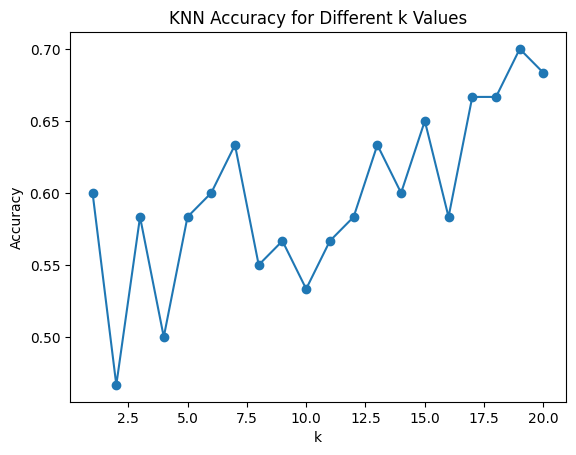

In [119]:
# KNN accuracyni turli xil k qiymatlar uchun tekshiramiz 

k_values = range(1, 21)
accuracy_list = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    accuracy_list.append(accuracy_score(y_test, knn.predict(x_test)))

plt.plot(k_values, accuracy_list, marker='o')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [120]:
# 1- natija

#Mean accuracy from cross-validation: 0.60
#Standard deviation of cross-validation scores: 0.05

# 2- natija
#Mean accuracy from cross-validation: 0.78
#Standard deviation of cross-validation scores: 0.03